# Phase coverage

Given a certain period, *portrait* can be used to compute how much of an orbit is covered by certain observations.

## Simulating some data

We start by simulating some observed times, but of course you can use your own observation times.

In [1]:
import numpy as np

length = 4 / 24  # the length (in hours) of a single observation
days = 20  # the number of observations
exposure = 20 / 60 / 24  # exposure of an observation

# we observe `length` hours every day for `days` days
times = np.hstack([np.arange(0, length, exposure) + i for i in np.arange(days)])

## Computing the phase coverage

We would then like to compute the coverage for a range of periods

In [2]:
from portrait import coverage

periods = np.linspace(0.1, 10, 2000)  # in days
covered = coverage(times)(periods)

let's plot the results

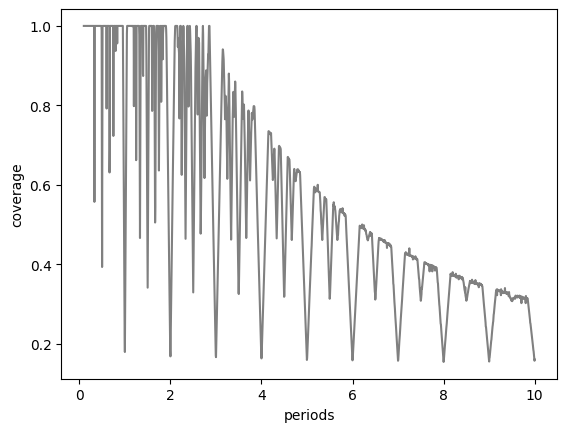

In [3]:
import matplotlib.pyplot as plt

plt.subplot(111, xlabel="periods", ylabel="coverage")
plt.plot(periods, covered, c="0.5")

coverage of 1. means a period that has been fully covered. For this particular simulation (4 hours per night observations) the minima corresponds to the day/night cycle.

```{note}
In many scenarios, two events need to be observed in order to be detected (such as exoplanet transits). For that reason you can specify the coverage for `n` events using `coverage(n=...)`. See an [example here](tess).
```

```{note}

## Application

*portrait* is particularly useful to understand how much a periodic orbit is covered by certain observations. It can be used to know if a planet with a certain orbital period was susceptible to be observed or not. If $c$ is the coverage at a certain period $P$, of particular interest is the quantity

$$C = \int_0^P c\,dP$$

which corresponds to how much orbits with periods *up to $P$* have been observed given certain observation times.

```{note}
Keep in mind that phase coverage is a mean quantity, and that actual phase coverage highly depend on the phase of an event during its orbit (such as the transit mid-time for a transiting exoplanet) 
```